### Unveiling a classification model- Whether the patient is at diabetes risk or not.
1. for Data Scientist[to understand underlying patterns discovered by the model] using `Boolean Rule Column Generation` explained provided by AI 360 Explainability Toolkit.
2. For doctors- to compare similar profile using `Protodash Explainer.`
3. For patient- what do they need to be not at risk using `Contrastive Explanations Method` (CEM) algorithm using AI Explainability 360 on Diabetes Data.
 

### Install the required Libraries.
Uncomment them and Run the Cells

In [5]:
# !pip install aix360

In [23]:
# !pip install lightgbm

In [6]:
# !pip install pandas_profiling

In [8]:
# !pip install keras

## Part-1 Boolean Rule Column Generation explainer
Using the `Diabetes Data`, we will do

- Exploratory Data Analysis
- Build Lightgbm model.
- Feature importance.
- Unveiling Fraud Detection AI Model for Data Scientist using `Boolean Rule Column Generation explainer` provided by AI 360 Explainability Toolkit.

### Import the Libraries.

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import ipaddress
import pandas_profiling as pp
%matplotlib inline
from sklearn import preprocessing
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Load the `Diabetes-Data` as csv in the notebook. 

* Click on the `0100` on the top right corner. 
* Drag and Drop `diabetes-data.csv` 
* Select the Cell below. 
* Click on `Insert to Code` and then `Pandas Dataframe.`

In [27]:
#load the data here 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,Old,1
1,1,85,66,29,0,26.6,0.351,Young,0
2,8,183,64,0,0,23.3,0.672,Young,1
3,1,89,66,23,94,28.1,0.167,Young,0
4,0,137,40,35,168,43.1,2.288,Young,1


As we can see, some of the columns have zero values to it. Insulin have zeros, Skin thickness is zero which is not possible. Let's check all the columns having zeros and treat them.

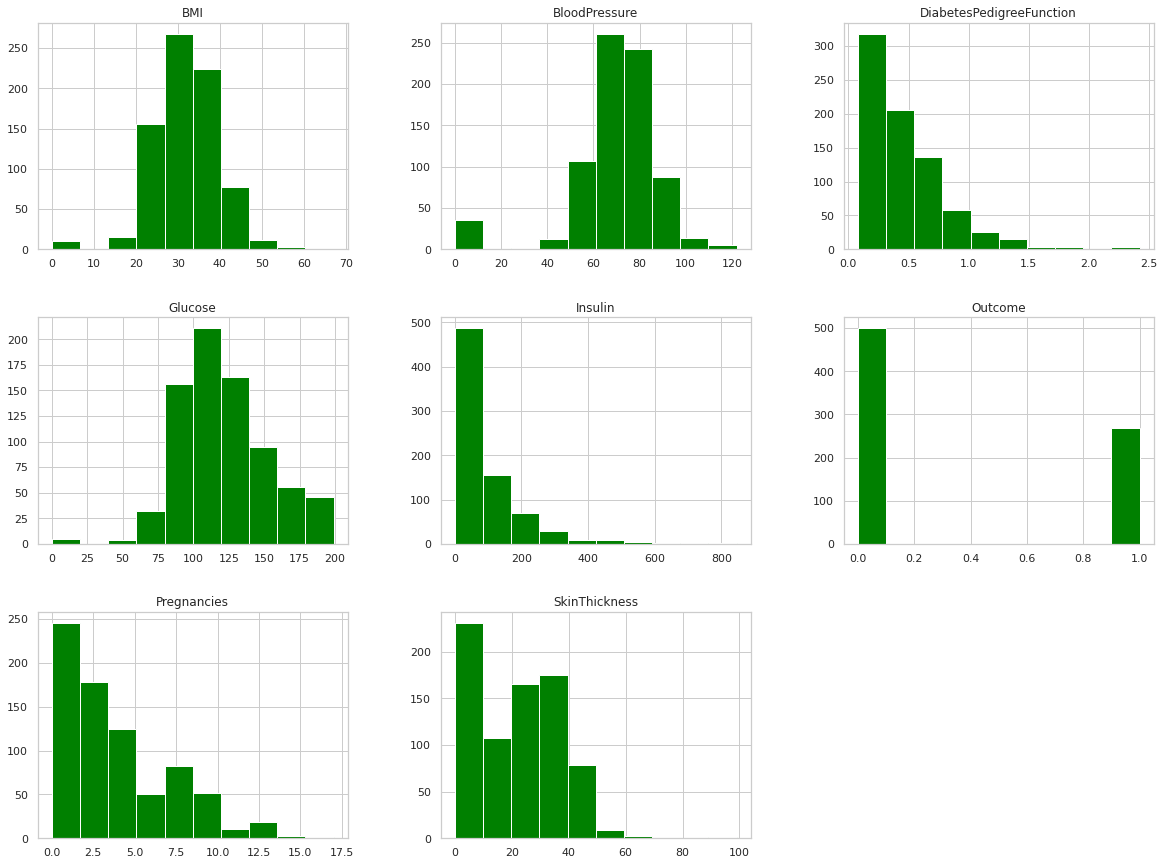

In [28]:
df.hist(color='green', figsize=(20,15));

- SkinThickness, Insulin is right skewed.
- BMI, and BloodPressure is normally distributed.
- Glucose is left skewed.
- is normally distributed like BMI, and BloodPressure. If we fill zeros with median of that columns, we wouldn't disrupt the data. For left, and right skewed data, we can fill zeros with median of that columns.

In [29]:
df_treated = df.copy()
df_treated['Insulin'].replace(0, df_treated['Insulin'].median(), inplace=True)
df_treated['SkinThickness'].replace(0, df_treated['SkinThickness'].median(), inplace=True)
df_treated['BMI'].replace(0, df_treated['BMI'].mean(), inplace=True)
df_treated['Glucose'].replace(0, df_treated['Glucose'].median(), inplace=True)
df_treated['BloodPressure'].replace(0,df_treated['BloodPressure'].mean(), inplace=True)

In [30]:
# pp.ProfileReport(df_treated)

In [31]:
count_Diabet_risk = len(df[df['Outcome']==0])
count_non_Diabet_risk = len(df[df['Outcome']==1])
pct_of_non_Diabet_risk =count_non_Diabet_risk/(count_non_Diabet_risk +count_Diabet_risk )
print("percentage of non_Diabet_risk is", round(pct_of_non_Diabet_risk*100,2))
pct_of_Diabet_risk= count_Diabet_risk/(count_non_Diabet_risk +count_Diabet_risk)
print("percentage of Fraud Risk", round(pct_of_Diabet_risk*100,2))

percentage of non_Diabet_risk is 34.9
percentage of Fraud Risk 65.1


#### Select input and target variables

In [32]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df_treated['Age']= le.fit_transform(df_treated['Age']) 


In [33]:
df_treated

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,30.5,33.6,0.627,0,1
1,1,85,66.0,29,30.5,26.6,0.351,1,0
2,8,183,64.0,23,30.5,23.3,0.672,1,1
3,1,89,66.0,23,94.0,28.1,0.167,1,0
4,0,137,40.0,35,168.0,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,0,0
764,2,122,70.0,27,30.5,36.8,0.340,1,0
765,5,121,72.0,23,112.0,26.2,0.245,1,0
766,1,126,60.0,23,30.5,30.1,0.349,1,1


In [34]:

from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df_treated[['Age']]).toarray())


In [35]:
df_final = df_treated.drop(['Age'], axis = 1) 
df_final


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72.0,35,30.5,33.6,0.627,1
1,1,85,66.0,29,30.5,26.6,0.351,0
2,8,183,64.0,23,30.5,23.3,0.672,1
3,1,89,66.0,23,94.0,28.1,0.167,0
4,0,137,40.0,35,168.0,43.1,2.288,1
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,0
764,2,122,70.0,27,30.5,36.8,0.340,0
765,5,121,72.0,23,112.0,26.2,0.245,0
766,1,126,60.0,23,30.5,30.1,0.349,1


In [36]:
X = df_final[df_final.columns[0:7]]
# merge one hot encoded 'Age' column with the other features of the dataframe
X = X.join(enc_df) 
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,0,1
0,6,148,72.0,35,30.5,33.6,0.627,1.0,0.0
1,1,85,66.0,29,30.5,26.6,0.351,0.0,1.0
2,8,183,64.0,23,30.5,23.3,0.672,0.0,1.0
3,1,89,66.0,23,94.0,28.1,0.167,0.0,1.0
4,0,137,40.0,35,168.0,43.1,2.288,0.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,1.0,0.0
764,2,122,70.0,27,30.5,36.8,0.340,0.0,1.0
765,5,121,72.0,23,112.0,26.2,0.245,0.0,1.0
766,1,126,60.0,23,30.5,30.1,0.349,0.0,1.0


In [38]:
y = df_final[df_final.columns[7:]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
print("Train_x Shape :: ", X_train.shape)
print("Train_y Shape :: ", y_train.shape)
print("Test_x Shape :: ", X_test.shape)
print("Test_y Shape :: ", y_test.shape)

Train_x Shape ::  (537, 9)
Train_y Shape ::  (537, 1)
Test_x Shape ::  (231, 9)
Test_y Shape ::  (231, 1)


In [42]:
d_train = lgb.Dataset(X_train, label=y_train)

#### Building the model with default parameters

In [43]:
def LGBM_classifier(features, target):
    """
    To train the LGBM classifier with features and target data
    :param features:
    :param target:
    :return: trained LGBM classifier
    """
    model = LGBMClassifier(metric='binary_logloss', objective='binary')
    model.fit(features, target)
    return model

start = time.time()
trained_model = LGBM_classifier(X_train, y_train.values.ravel())
print("> Completion Time : ", time.time() - start)
print("Trained LGBM model :: ", trained_model)
predictions = trained_model.predict(X_test)

> Completion Time :  881.1715593338013
Trained LGBM model ::  LGBMClassifier(metric='binary_logloss', objective='binary')


In [44]:
print("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print("LGBM Model Test Accuracy is :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
LGBM Model Test Accuracy is ::  0.7619047619047619


#### Check The feature Importance.

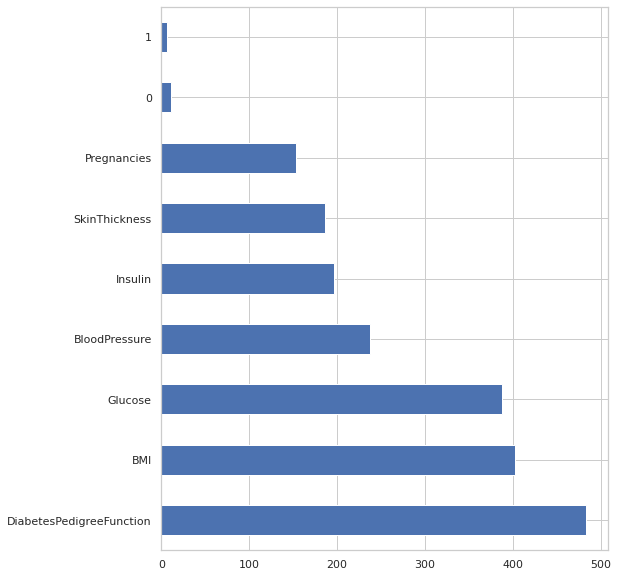

In [45]:
feat_imp = pd.Series(trained_model.feature_importances_, index=X.columns)
feat_imp.nlargest(12).plot(kind='barh', figsize=(8,10))

## Unveiling Diabetes Detection AI Model for Data Scientist using Boolean Rule Column Generation explainer and Logistic Rule Regression models provided by AI 360 Explainability Toolkit.

Data scientist: Boolean Rule and Logistic Rule Regression models
In evaluating a machine learning model for deployment, a data scientist would ideally like to understand the behavior of the model as a whole, not just in specific instances. This is especially true in regulated industries such as banking where higher standards of explainability may be required. 

For example, the data scientist may have to present the model to:

1) technical and business managers for review before deployment, 2) a lending expert to compare the model to the expert's knowledge, or 3) a regulator to check for compliance.

BRCG, which is designed to produce a very simple OR-of-ANDs rule (known more formally as disjunctive normal form, DNF) or alternatively an AND-of-ORs rule (conjunctive normal form, CNF) to predict whether an applicant is not at Fraud risk (Y = 1). For a binary classification problem such as we have here, a DNF rule is equivalent to a rule set, where AND clauses in the DNF correspond to individual rules in the rule set. Furthermore, it can be shown that a CNF rule for Y = 1 is equivalent to a DNF rule for Y = 0.
BRCG is distinguished by its use of the optimization technique of column generation to search the space of possible clauses, which is exponential in size. To learn more about column generation, please see NeurIPS paper.

In [46]:
X = df_final[df_final.columns[0:7]]
# merge one hot encoded 'Age' column with the other features of the dataframe
X = X.join(enc_df) 
X



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,0,1
0,6,148,72.0,35,30.5,33.6,0.627,1.0,0.0
1,1,85,66.0,29,30.5,26.6,0.351,0.0,1.0
2,8,183,64.0,23,30.5,23.3,0.672,0.0,1.0
3,1,89,66.0,23,94.0,28.1,0.167,0.0,1.0
4,0,137,40.0,35,168.0,43.1,2.288,0.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,1.0,0.0
764,2,122,70.0,27,30.5,36.8,0.340,0.0,1.0
765,5,121,72.0,23,112.0,26.2,0.245,0.0,1.0
766,1,126,60.0,23,30.5,30.1,0.349,0.0,1.0


In [47]:
y = df_final["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [48]:
print(X.shape)
print(y.shape)

(768, 9)
(768,)


In [49]:
from sklearn.model_selection import train_test_split
dfTrain, dfTest, yTrain, yTest = train_test_split(X, y, random_state=0,test_size=0.3)
dfTrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,0,1
580,0,151,90.0,46,30.5,42.1,0.371,0.0,1.0
418,1,83,68.0,23,30.5,18.2,0.624,0.0,1.0
764,2,122,70.0,27,30.5,36.8,0.340,0.0,1.0
363,4,146,78.0,23,30.5,38.5,0.520,1.0,0.0
757,0,123,72.0,23,30.5,36.3,0.258,1.0,0.0


### Binarize data and also return standardized ordinal features

In [50]:
# Binarize data and also return standardized ordinal features
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)
dfTrain, dfTrainStd = fb.fit_transform(dfTrain)
dfTest, dfTestStd = fb.transform(dfTest)
dfTrain['Glucose'].head()

operation    <=                                                     >        \
value     86.6  95.2  102.8 111.0 118.0 125.6 135.2 147.0 168.0 86.6  95.2    
580           0     0     0     0     0     0     0     0     1     1     1   
418           1     1     1     1     1     1     1     1     1     0     0   
764           0     0     0     0     0     1     1     1     1     1     1   
363           0     0     0     0     0     0     0     1     1     1     1   
757           0     0     0     0     0     1     1     1     1     1     1   

operation                                            
value     102.8 111.0 118.0 125.6 135.2 147.0 168.0  
580           1     1     1     1     1     1     0  
418           0     0     0     0     0     0     0  
764           1     1     1     0     0     0     0  
363           1     1     1     1     1     0     0  
757           1     1     1     0     0     0     0

In [53]:
# Instantiate BRCG with small complexity penalty and large beam search width
from aix360.algorithms.rbm import BooleanRuleCG
br = BooleanRuleCG(lambda0=1e-3, lambda1=1e-3, CNF=True)

# Train, print, and evaluate model
br.fit(dfTrain, yTrain)

Learning CNF rule with complexity parameters lambda0=0.001, lambda1=0.001
Initial LP solved


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 1, Objective: 0.2534


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 2, Objective: 0.2484


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 3, Objective: 0.2471


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 4, Objective: 0.2424


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 5, Objective: 0.2395


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 6, Objective: 0.2377


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 7, Objective: 0.2353


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 8, Objective: 0.2346


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 9, Objective: 0.2326


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 10, Objective: 0.2313


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 11, Objective: 0.2301


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 12, Objective: 0.2300


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

Iteration: 13, Objective: 0.2300


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/opt/conda/envs/Python-3.7-main/li

In [55]:
from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(yTrain, br.predict(dfTrain)))
print('Test accuracy:', accuracy_score(yTest, br.predict(dfTest)))
print('Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:')
print(br.explain()['rules'])

Training accuracy: 0.7895716945996276
Test accuracy: 0.7272727272727273
Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:
['Glucose <= 86.60', 'BMI <= 26.64', 'Glucose <= 135.20 AND DiabetesPedigreeFunction <= 0.22', 'Pregnancies <= 4.00 AND Glucose <= 125.60', 'Pregnancies <= 7.00 AND Glucose <= 168.00 AND Glucose > 95.20 AND BloodPressure > 70.00 AND BMI <= 41.74 AND BMI > 24.06 AND 0 not  AND 1  ']


#### You will see something like this, 
Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:

['Glucose <= 86.60', 'BMI <= 26.64', 'Glucose <= 135.20 AND DiabetesPedigreeFunction <= 0.22', 'Pregnancies <= 4.00 AND Glucose <= 125.60', 'Pregnancies <= 7.00 AND Glucose <= 168.00 AND Glucose > 95.20 AND BloodPressure > 70.00 AND BMI <= 41.74 AND BMI > 24.06 AND 0 not  AND 1  ']

`The above results shows the rules identified by the model in the data to a data Scientist.`

## Part-2 Protodash Explainer

* The method selects applications from the training set that are similar in different ways to the user application we want to explain. For example, a patient is predicted at Diabetes Risk. There could be mutliple reasons for that, this algorithm compares the profile of differently similar patients and give a doctor better perspective and wholistic view of the patient so that they give better and personalised guidance. 

* It doesn't give standard explanation for every case by using basic similarity techniques such as which use metrics such as euclidean distance, cosine similarity amongst others. 
`Protodash provides a much more well rounded and comprehensive view of why the decision for the applicant may be justifiable.`


More Technical definition of Protodash : 

ProtodashExplainer provides exemplar-based explanations for summarizing datasets as well
as explaining predictions made by an AI model. It employs a fast gradient based algorithm to find prototypes along with their (non-negative) importance weights. The algorithm minimizes the maximummean discrepancy metric and has constant factor approximation guarantees for this weakly submodular function.

 [References:](https://arxiv.org/abs/1707.01212).
   Paper by : `Karthik S. Gurumoorthy, Amit Dhurandhar, Guillermo Cecchi,"ProtoDash: Fast Interpretable Prototype Selection"
        

In [56]:


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
import numpy as np

from aix360.algorithms.protodash import ProtodashExplainer

Using TensorFlow backend.


#### load the data again here! Follow the steps: 

* Load the `diabetes-data` as csv in the notebook.
* Click on the 0100 on the top right corner.
* Drag and Drop Fraud-Data.csv
* Click on `Insert to Code` and then `Pandas Dataframe.`
* Name the dataframe as `df`


In [87]:
#load the data here 





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,Old,1
1,1,85,66,29,0,26.6,0.351,Young,0
2,8,183,64,0,0,23.3,0.672,Young,1
3,1,89,66,23,94,28.1,0.167,Young,0
4,0,137,40,35,168,43.1,2.288,Young,1


In [88]:
df_treated = df.copy()
df_treated['Insulin'].replace(0, df_treated['Insulin'].median(), inplace=True)
df_treated['SkinThickness'].replace(0, df_treated['SkinThickness'].median(), inplace=True)
df_treated['BMI'].replace(0, df_treated['BMI'].mean(), inplace=True)
df_treated['Glucose'].replace(0, df_treated['Glucose'].median(), inplace=True)
df_treated['BloodPressure'].replace(0,df_treated['BloodPressure'].mean(), inplace=True)

In [94]:

# generate binary values using get_dummies
dum_df = pd.get_dummies(df_treated, columns=["Age"], prefix=["Age_is"] )
dum_df
dum_df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome', 'Age_is_Old',
       'Age_is_Young'],
      dtype='object')

In [95]:
df_final = dum_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age_is_Old',
       'Age_is_Young','Outcome']] 



df_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_is_Old,Age_is_Young,Outcome
0,6,148,72.0,35,30.5,33.6,0.627,1,0,1
1,1,85,66.0,29,30.5,26.6,0.351,0,1,0
2,8,183,64.0,23,30.5,23.3,0.672,0,1,1
3,1,89,66.0,23,94.0,28.1,0.167,0,1,0
4,0,137,40.0,35,168.0,43.1,2.288,0,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,1,0,0
764,2,122,70.0,27,30.5,36.8,0.340,0,1,0
765,5,121,72.0,23,112.0,26.2,0.245,0,1,0
766,1,126,60.0,23,30.5,30.1,0.349,0,1,1


In [96]:
X = df_final[df_final.columns[0:9]]

X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_is_Old,Age_is_Young
0,6,148,72.0,35,30.5,33.6,0.627,1,0
1,1,85,66.0,29,30.5,26.6,0.351,0,1
2,8,183,64.0,23,30.5,23.3,0.672,0,1
3,1,89,66.0,23,94.0,28.1,0.167,0,1
4,0,137,40.0,35,168.0,43.1,2.288,0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,1,0
764,2,122,70.0,27,30.5,36.8,0.340,0,1
765,5,121,72.0,23,112.0,26.2,0.245,0,1
766,1,126,60.0,23,30.5,30.1,0.349,0,1


In [97]:

y =df_final[df_final.columns[9:]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### Splitting the data with 70:30 mix

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [99]:
Z = np.vstack((X_train, X_test))
Zmax = np.max(Z, axis=0)
Zmin = np.min(Z, axis=0)

#normalize an array of samples to range [-0.5, 0.5]
def normalize(V):
    VN = (V - Zmin)/(Zmax - Zmin)
    VN = VN - 0.5
    return(VN)
    
# rescale a sample to recover original values for normalized values. 
def rescale(X):
    return(np.multiply ( X + 0.5, (Zmax - Zmin) ) + Zmin)

N = normalize(Z)
xn_train = N[0:X_train.shape[0], :]
xn_test  = N[X_train.shape[0]:, :]



In [100]:
xn_test[4]

array([-0.44117647, -0.03548387,  0.05102041, -0.26086957, -0.30048077,
       -0.13394683, -0.32152007, -0.5       ,  0.5       ])

In [1]:
## Designing a basic Neural Network.
def nn_small():
    model = Sequential()
    model.add(Dense(10, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal'  )  )
    model.add(Dense(2, kernel_initializer='normal'  )  )
    return model 

In [102]:
# Set random seeds for repeatability
np.random.seed(1) 
tf.set_random_seed(2) 


class_names = ['Diabetes-Risk', 'No-Diabetes-Risk']
# loss function
def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct, logits=predicted)

# compile and print model summary
nn = nn_small()
nn.compile(loss=fn, optimizer='adam', metrics=['accuracy'])
nn.summary()

es = EarlyStopping(monitor='val_loss', patience=10)

history = nn.fit(xn_train, y_train, batch_size=50, epochs=200, verbose=1, shuffle=False, callbacks=[es])


# evaluate model accuracy        
score = nn.evaluate(xn_train, y_train, verbose=0) #Compute training set accuracy
#print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = nn.evaluate(xn_test, y_test, verbose=0) #Compute test set accuracy
#print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
537/537 [==============================] - 0s 212us/step - loss: 0.4724 - accuracy: 0.9963
Epoch 2/200
537/537 [==============================] - 0s 52us/step - loss: 0.4724 - accuracy: 1.0000
Epoch 3/200
537/537 [==============================] - 0s 40us/step - loss: 0.4724 - accuracy: 1.0000
Epoch 4/200
537/537 [==============================] - 0s 45us/step - loss: 0.4

In [103]:
p_train = nn.predict_classes(xn_train) # Use trained neural network to predict train points
print(p_train)
p_train = p_train.reshape((p_train.shape[0],1))

z_train = np.hstack((xn_train, p_train)) # Store (normalized) instances that were predicted as Good/No Fraud Risk
z_train_good = z_train[z_train[:,-1]==1, :]

zun_train = np.hstack((xn_train, p_train)) # Store (unnormalized) instances that were predicted as Good 
zun_train_good = zun_train[zun_train[:,-1]==1, :]
print(zun_train_good)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [104]:
p_test = nn.predict_classes(xn_test)

In [105]:
p_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
idx = 0

X = xn_test[idx].reshape((1,) + xn_test[idx].shape)
# print(X)
print("Chosen Sample:", idx)
print("Prediction made by the model:", class_names[np.argmax(nn.predict_proba(X))])
print("Prediction probabilities:", nn.predict_proba(X))
print("")

# attach the prediction made by the model to X
X = np.hstack((X, nn.predict_classes(X).reshape((1,1))))
print(X)

x_test = X_test.to_numpy()
Xun = x_test[idx].reshape((1, ) + x_test[idx].shape)
print(Xun)

dfx = pd.DataFrame.from_records(Xun) # Create dataframe with original feature values
dfx
dfx[7] = int(X[0, -1])
dfx.columns = df.columns
dfx.transpose()

Chosen Sample: 0
Prediction made by the model: No-Diabetes-Risk
Prediction probabilities: [[-1511.812 -1511.798]]

[[-0.08823529  0.09354839  0.01020408 -0.29347826 -0.35456731 -0.3404908
  -0.25704526  0.5        -0.5         1.        ]]
[[  7.    136.     74.     26.    135.     26.      0.647   1.      0.   ]]


,0
Pregnancies,7.000
Glucose,136.000
BloodPressure,74.000
SkinThickness,26.000
Insulin,135.000
BMI,26.000
DiabetesPedigreeFunction,0.647
Age,1.000
Outcome,0.000


In [107]:
explainer = ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_train_good, m=5)

In [108]:
class_names = ['Diabetes-Risk ', 'No-Diabetes-Risk']

In [109]:
dfs = pd.DataFrame.from_records(zun_train_good[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
    RP.append(class_names[int(z_train_good[S[i], -1])]) # Append class names
dfs[23] = RP
dfs.columns = df_final.columns  
dfs["Weight"] = np.around(W, 5)/np.sum(np.around(W, 5)) # Calculate normalized importance weights
dfs.transpose()


,0,1,2,3,4
Pregnancies,-0.0882353,-0.5,0.264706,-0.0294118,0.0882353
Glucose,0.183871,-0.416129,0.151613,0.383871,0.112903
BloodPressure,0.0510204,-0.132653,0.0918367,-0.0510204,0.0714286
SkinThickness,-0.26087,-0.326087,-0.369565,-0.184783,-0.326087
Insulin,-0.365385,-0.480168,-0.384615,0.078125,-0.480168
BMI,-0.152352,-0.428425,-0.4182,-0.256646,-0.317996
DiabetesPedigreeFunction,-0.237831,-0.219471,-0.428693,-0.270709,0.0819812
Age_is_Old,0.5,0.5,0.5,0.5,0.5
Age_is_Young,-0.5,-0.5,-0.5,-0.5,-0.5
Outcome,No-Diabetes-Risk,No-Diabetes-Risk,No-Diabetes-Risk,No-Diabetes-Risk,No-Diabetes-Risk


### Note : The above table `This gives the profile of the instances similar to each other who have no Diabetes risk to the Doctor.`

## Part-3 : Demostrating `Contrastive Explanations Method (CEM) algorithm using AI Explainability 360` on Diabetes Data

### Contrastive Explanations Method (CEM) algorithm available in AI Explainability 360.

* `The algorithm outputs a contrastive explanation which consists of two parts: a) pertinent negatives (PNs) and b) pertinent positives (PPs). PNs identify a minimal set of features which if altered would change the classification of the original input.`


Compute Pertinent Negatives (PN):
In order to compute pertinent negatives, the CEM explainer computes a user profile that is close to the original applicant but for whom the decision of fraud risk is different. The explainer alters a minimal set of features by a minimal (positive) amount. This will help the user whose loan application was initially rejected say, to ascertain how to get it accepted.




In [7]:


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
import numpy as np


Using TensorFlow backend.


#### Load the `Diabetes-Data` as csv in the notebook. 

* Click on the `0100` on the top right corner. 
* Drag and Drop `diabetes-data.csv` 
* Select the Cell below. 
* Click on `Insert to Code` and then `Pandas Dataframe.`

In [8]:
#load the data here 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,Old,1
1,1,85,66,29,0,26.6,0.351,Young,0
2,8,183,64,0,0,23.3,0.672,Young,1
3,1,89,66,23,94,28.1,0.167,Young,0
4,0,137,40,35,168,43.1,2.288,Young,1


In [9]:
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True)
df['BMI'].replace(0, df['BMI'].mean(), inplace=True)
df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(), inplace=True)

In [10]:
dum_df = pd.get_dummies(df, columns=["Age"], prefix=["Age_is"] )

df_final = dum_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age_is_Old',
       'Age_is_Young','Outcome']] 



df_final



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_is_Old,Age_is_Young,Outcome
0,6,148,72.0,35,30.5,33.6,0.627,1,0,1
1,1,85,66.0,29,30.5,26.6,0.351,0,1,0
2,8,183,64.0,23,30.5,23.3,0.672,0,1,1
3,1,89,66.0,23,94.0,28.1,0.167,0,1,0
4,0,137,40.0,35,168.0,43.1,2.288,0,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,1,0,0
764,2,122,70.0,27,30.5,36.8,0.340,0,1,0
765,5,121,72.0,23,112.0,26.2,0.245,0,1,0
766,1,126,60.0,23,30.5,30.1,0.349,0,1,1


In [11]:
X = df_final[df_final.columns[0:9]]

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_is_Old,Age_is_Young
0,6,148,72.0,35,30.5,33.6,0.627,1,0
1,1,85,66.0,29,30.5,26.6,0.351,0,1
2,8,183,64.0,23,30.5,23.3,0.672,0,1
3,1,89,66.0,23,94.0,28.1,0.167,0,1
4,0,137,40.0,35,168.0,43.1,2.288,0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,1,0
764,2,122,70.0,27,30.5,36.8,0.340,0,1
765,5,121,72.0,23,112.0,26.2,0.245,0,1
766,1,126,60.0,23,30.5,30.1,0.349,0,1


In [12]:

y =df_final[df_final.columns[9:]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1,stratify=y)

### Normalising the dataset 

In [14]:
Z = np.vstack((x_train, x_test))
Zmax = np.max(Z, axis=0)
Zmin = np.min(Z, axis=0)

#normalize an array of samples to range [-0.5, 0.5]
def normalize(V):
    VN = (V - Zmin)/(Zmax - Zmin)
    VN = VN - 0.5
    return(VN)
    
# rescale a sample to recover original values for normalized values. 
def rescale(X):
    return(np.multiply ( X + 0.5, (Zmax - Zmin) ) + Zmin)

N = normalize(Z)
xn_train = N[0:x_train.shape[0], :]
xn_test  = N[x_train.shape[0]:, :]

In [15]:
xn_test[0]

array([-0.44117647, -0.20322581, -0.1122449 , -0.44565217, -0.46514423,
       -0.31595092, -0.28565329, -0.5       ,  0.5       ])

### Define and train a Neural Network Classifier

In [16]:
from aix360.algorithms.contrastive import CEMExplainer, KerasClassifier

In [17]:
def nn_small():
    model = Sequential()
    model.add(Dense(10, input_dim=9, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(4, kernel_initializer='normal'  )  )
    model.add(Dense(2, kernel_initializer='normal'  )  )
    return model  

In [18]:
# Set random seeds for repeatability
np.random.seed(1) 
tf.set_random_seed(2) 


class_names = ['no-Diabetes-risk', 'Diabetes-risk']

# loss function
def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct, logits=predicted)

# compile and print model summary
nn = nn_small()
nn.compile(loss=fn, optimizer='adam', metrics=['accuracy'])
nn.summary()

nn.fit(xn_train, y_train, batch_size=100, epochs=200, verbose=1, shuffle=False)


# evaluate model accuracy        
score = nn.evaluate(xn_train, y_train, verbose=0) #Compute training set accuracy
#print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = nn.evaluate(xn_test, y_test, verbose=0) #Compute test set accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________

Epoch 1/200
460/460 [==============================] - 0s 221us/step - loss: 0.4852 - accuracy: 0.8978
Epoch 2/200
460/460 [==============================] - 0s 16us/step - loss: 0.4852 - accuracy: 0.8957
Epoch 3/200
460/460 [==============================] - 0s 26us/step - loss: 0.4852 - accuracy: 0.9087
Epoch 4/200
460/460

In [19]:
# try on samples.
idx =1
# print(xn_test[idx].reshape((1,) + xn_test[idx].shape))
      
X = xn_test[idx].reshape((1,) + xn_test[idx].shape)
print("Computing PN for Sample:", idx)
print("Prediction made by the model:", nn.predict_proba(X))
print("Prediction probabilities:", class_names[np.argmax(nn.predict_proba(X))])
print("")

mymodel = KerasClassifier(nn)
explainer = CEMExplainer(mymodel)

arg_mode = 'PN' # Find pertinent negatives
arg_max_iter = 500 # Maximum number of iterations to search for the optimal PN for given parameter settings
arg_init_const = 10.0 # Initial coefficient value for main loss term that encourages class change
arg_b = 9 # No. of updates to the coefficient of the main loss term
arg_kappa = 0.02 # Minimum confidence gap between the PNs (changed) class probability and original class' probability
arg_beta = 1e-1 # Controls sparsity of the solution (L1 loss)
arg_gamma = 100 # Controls how much to adhere to a (optionally trained) auto-encoder
my_AE_model = None # Pointer to an auto-encoder
arg_alpha = 0.01 # Penalizes L2 norm of the solution
arg_threshold = 1. # Automatically turn off features <= arg_threshold if arg_threshold < 1
arg_offset = 0.5 # the model assumes classifier trained on data normalized
                # in [-arg_offset, arg_offset] range, where arg_offset is 0 or 0.5
# Find PN for patient 1 
(adv_pn, delta_pn, info_pn) = explainer.explain_instance(X, arg_mode, my_AE_model, arg_kappa, arg_b,
                                                         arg_max_iter, arg_init_const, arg_beta, arg_gamma,
                                                            arg_alpha, arg_threshold, arg_offset)

Computing PN for Sample: 1
Prediction made by the model: [[-16.136536 -16.114416]]
Prediction probabilities: Diabetes-risk




Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

iter:0 const:[10.]
Loss_Overall:0.4212, Loss_Attack:0.4212
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-16.1144, max_nontarget_lab_score:-16.1365

iter:250 const:[10.]
Loss_Overall:0.4212, Loss_Attack:0.4212
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-16.1144, max_nontarget_lab_score:-16.1365

iter:0 const:[100.]
Loss_Overall:4.2121, Loss_Attack:4.2121
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-16.1144, max_nontarget_lab_score:-16.1365

iter:250 const:[100.]
Loss_Overall:4.2121, Loss_Attack:4.2121
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-16.1144, max_nontarget_lab_score:-16.1365

iter:

In [20]:
Xpn = adv_pn
classes = [ class_names[np.argmax(nn.predict_proba(X))], class_names[np.argmax(nn.predict_proba(Xpn))], 'NIL' ]

print("Sample:", idx)
print("prediction(X)", nn.predict_proba(X), class_names[np.argmax(nn.predict_proba(X))])
print("prediction(Xpn)", nn.predict_proba(Xpn), class_names[np.argmax(nn.predict_proba(Xpn))] )


X_re = rescale(X) # Convert values back to original scale from normalized
Xpn_re = rescale(Xpn)
Xpn_re = np.around(Xpn_re.astype(np.double), 2)

delta_re = Xpn_re - X_re
delta_re = np.around(delta_re.astype(np.double), 2)
delta_re[np.absolute(delta_re) < 1e-4] = 0

X3 = np.vstack((X_re, Xpn_re, delta_re))

dfre = pd.DataFrame.from_records(X3) # Create dataframe to display original point, PN and difference (delta)
dfre[23] = classes

dfre.columns = df_final.columns
dfre.rename(index={0:'X',1:'X_PN', 2:'(X_PN - X)'}, inplace=True)
dfret = dfre.transpose()


def highlight_ce(s, col, ncols):
    if (type(s[col]) != str):
        if (abs(s[col]) > 1):
            return(['background-color: yellow']*ncols)    
    return(['background-color: white']*ncols)

dfret.style.apply(highlight_ce, col='X_PN', ncols=3, axis=1) 

Sample: 1
prediction(X) [[-16.136536 -16.114416]] Diabetes-risk
prediction(Xpn) [[-43.4475   -43.518078]] no-Diabetes-risk


,X,X_PN,(X_PN - X)
Pregnancies,0.000000,0.000000,0.000000
Glucose,137.000000,44.000000,-93.000000
BloodPressure,84.000000,24.000000,-60.000000
SkinThickness,27.000000,7.000000,-20.000000
Insulin,30.500000,14.000000,-16.500000
BMI,27.300000,18.200000,-9.100000
DiabetesPedigreeFunction,0.231000,0.080000,-0.150000
Age_is_Old,1.000000,0.000000,-1.000000
Age_is_Young,0.000000,0.000000,0.000000
Outcome,Diabetes-risk,no-Diabetes-risk,NIL


### The above results show that the patient should have 'less Glucose, Blood Pressure', 'Skin Thickness', Insulin, BMI for it to classified as `No-Diabetes-risk`